# Seaborn
- 여러 변수 간의 관계를 검사하기 위한 데이터 집합 지향 API
- 범주형 변수를 사용하여 관측치 또는 집계 통계량을 표시하기 위한 전문적인 지원
- 일변량 또는 이변량 분포를 시각화하고 데이터의 부분 집합 간 비교하기 위한 옵션
- 서로 다른 종류의 종속 변수에 대한 선형 회귀 모형의 자동 추정 및 표시
- 복잡한 데이터셋의 전체 구조에 대한 편리한 보기
- 복잡한 시각화를 쉽게 구축할 수 있는 다중 플롯 그리드 구조를 위한 높은 수준의 추상화
- 여러 테마가 내장된 matplotlib 그림 스타일링 제어
- 데이터의 패턴을 충실히 나타내는 색상 팔레트 선택 도구

In [1]:
import seaborn as sns
sns.set(style='whitegrid')
sns.__version__

'0.11.2'

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import warnings

warnings.filterwarnings(action='ignore')

## 산점도 (Scatter Plot)

In [4]:
penguins = sns.load_dataset('penguins')
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

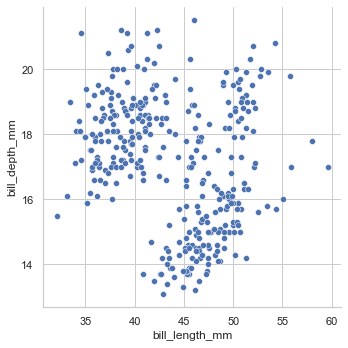

In [5]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', data=penguins);

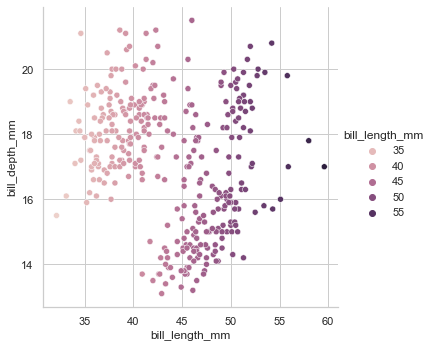

In [6]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm',
            hue='bill_length_mm', data=penguins);

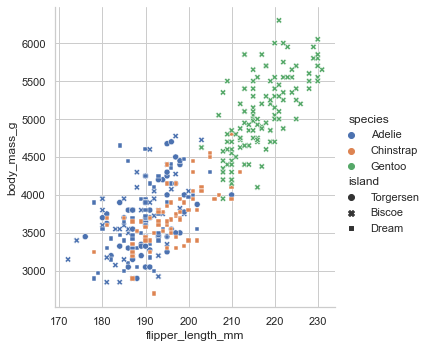

In [7]:
sns.relplot(x='flipper_length_mm', y='body_mass_g',
            hue='species', style='island', data=penguins);

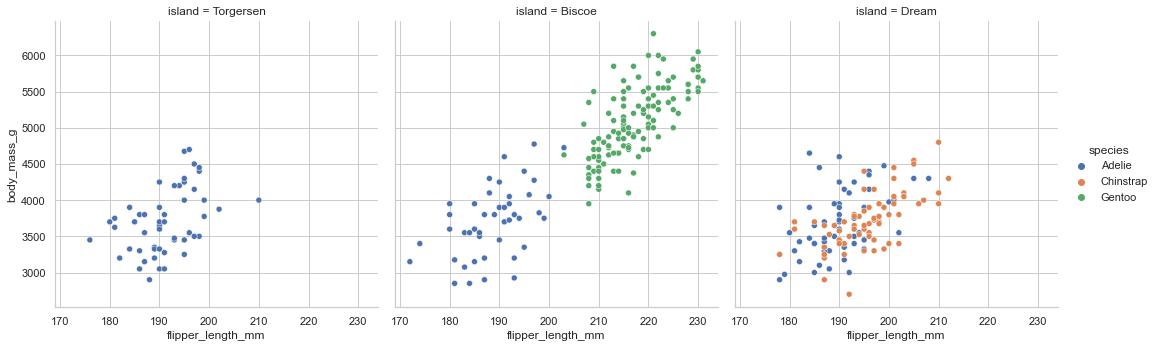

In [8]:
sns.relplot(x='flipper_length_mm', y='body_mass_g',
            hue='species', col='island', data=penguins);

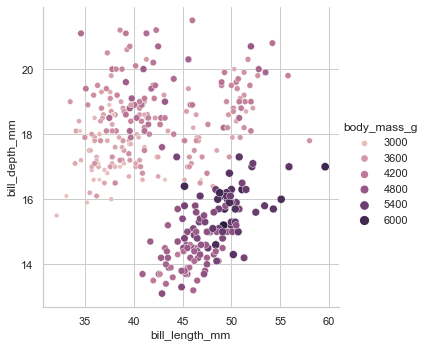

In [9]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm',
            hue='body_mass_g', size='body_mass_g', data=penguins);

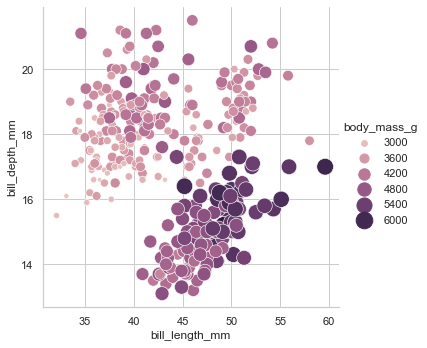

In [10]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm',
            hue='body_mass_g', size='body_mass_g',
            sizes=(10,300), data=penguins);

## 라인 플롯 (Line Plot)

In [11]:
flights = sns.load_dataset('flights')
flights

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

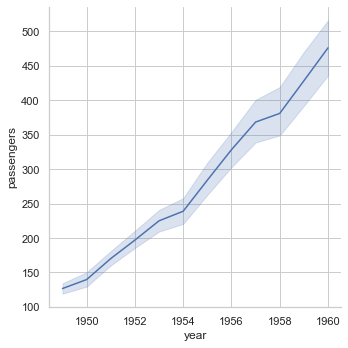

In [12]:
sns.relplot(x='year', y='passengers',
            kind='line', data=flights);

In [13]:
dots = sns.load_dataset('dots')
dots

align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[848 rows x 5 columns]

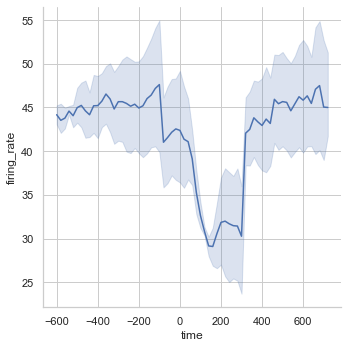

In [14]:
# 95% 신뢰구간을 범위로 보여줌
sns.relplot(x='time', y='firing_rate',
           kind='line', data=dots);

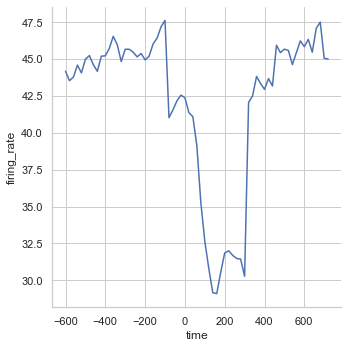

In [15]:
# 범위 보여주지 않기
sns.relplot(x='time', y='firing_rate',
            ci=None, kind='line', data=dots);

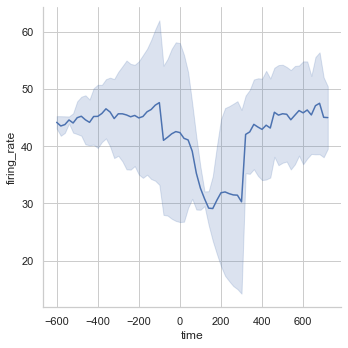

In [16]:
# 표준편차로 보여주기
sns.relplot(x='time', y='firing_rate',
            ci='sd', kind='line', data=dots);

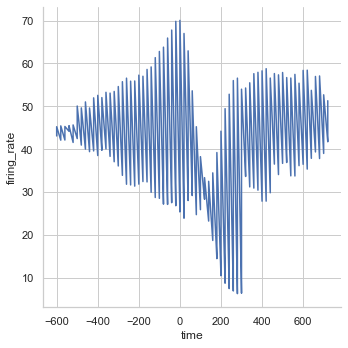

In [17]:
# 집계에 대한 통계량으로 나타내지 말아줘
sns.relplot(x='time', y='firing_rate',
            estimator=None, kind='line', data=dots);

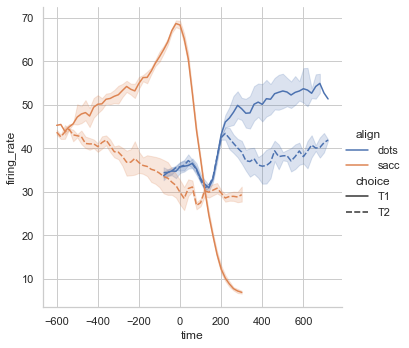

In [18]:
sns.relplot(x='time', y='firing_rate',
            hue='align', style='choice',
            kind='line', data=dots);

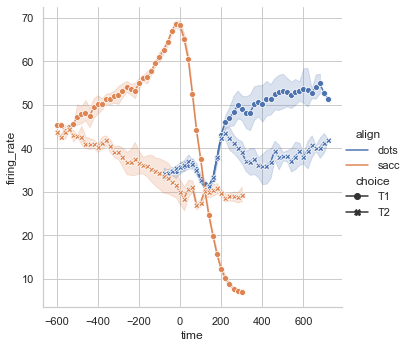

In [19]:
# 보기 복잡함. col 이용해서 구별해서 보기
sns.relplot(x='time', y='firing_rate',
            hue='align', style='choice',
            dashes=False, markers=True,
            kind='line', data=dots);

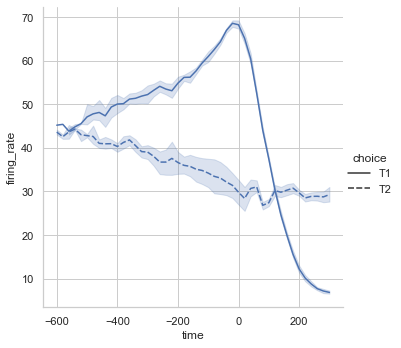

In [20]:
# pandas query 이용
sns.relplot(x='time', y='firing_rate',
            style='choice',
            kind='line', data=dots.query("align == 'sacc'"));

In [21]:
fmri = sns.load_dataset('fmri')
fmri

subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]

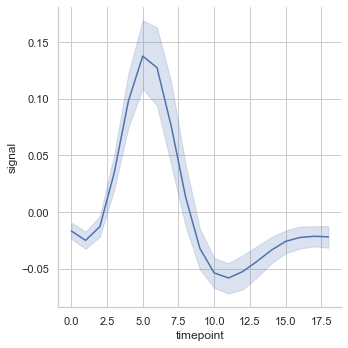

In [22]:
# seaborn에서 정렬 알아서 해주고 시각화해줌.
sns.relplot(x='timepoint', y='signal',
           kind='line', data=fmri);

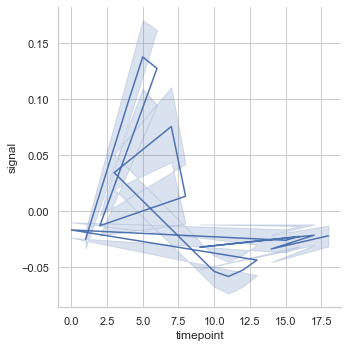

In [23]:
# 정렬하지 않기
sns.relplot(x='timepoint', y='signal',
           sort=False, kind='line', data=fmri);

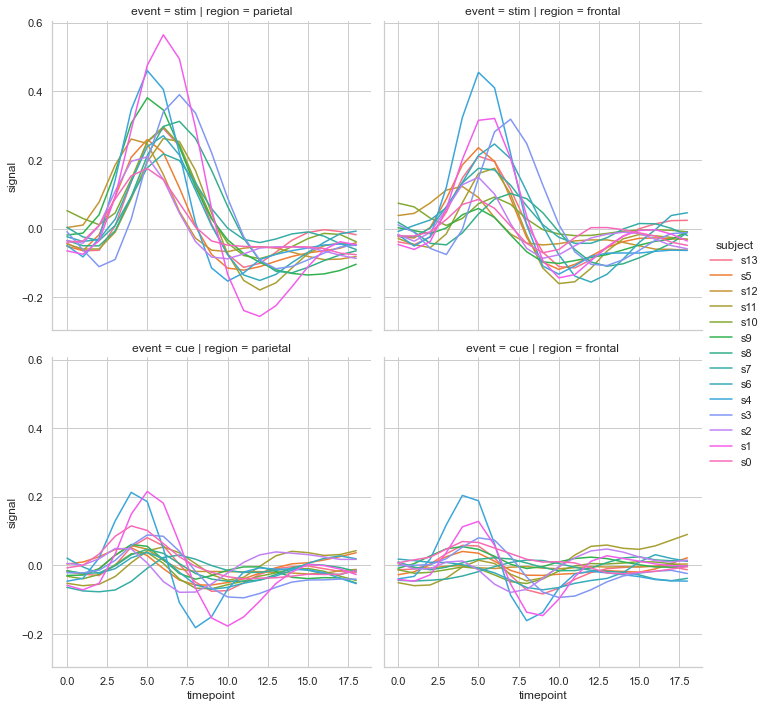

In [24]:
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region', row='event',
           kind='line', data=fmri);

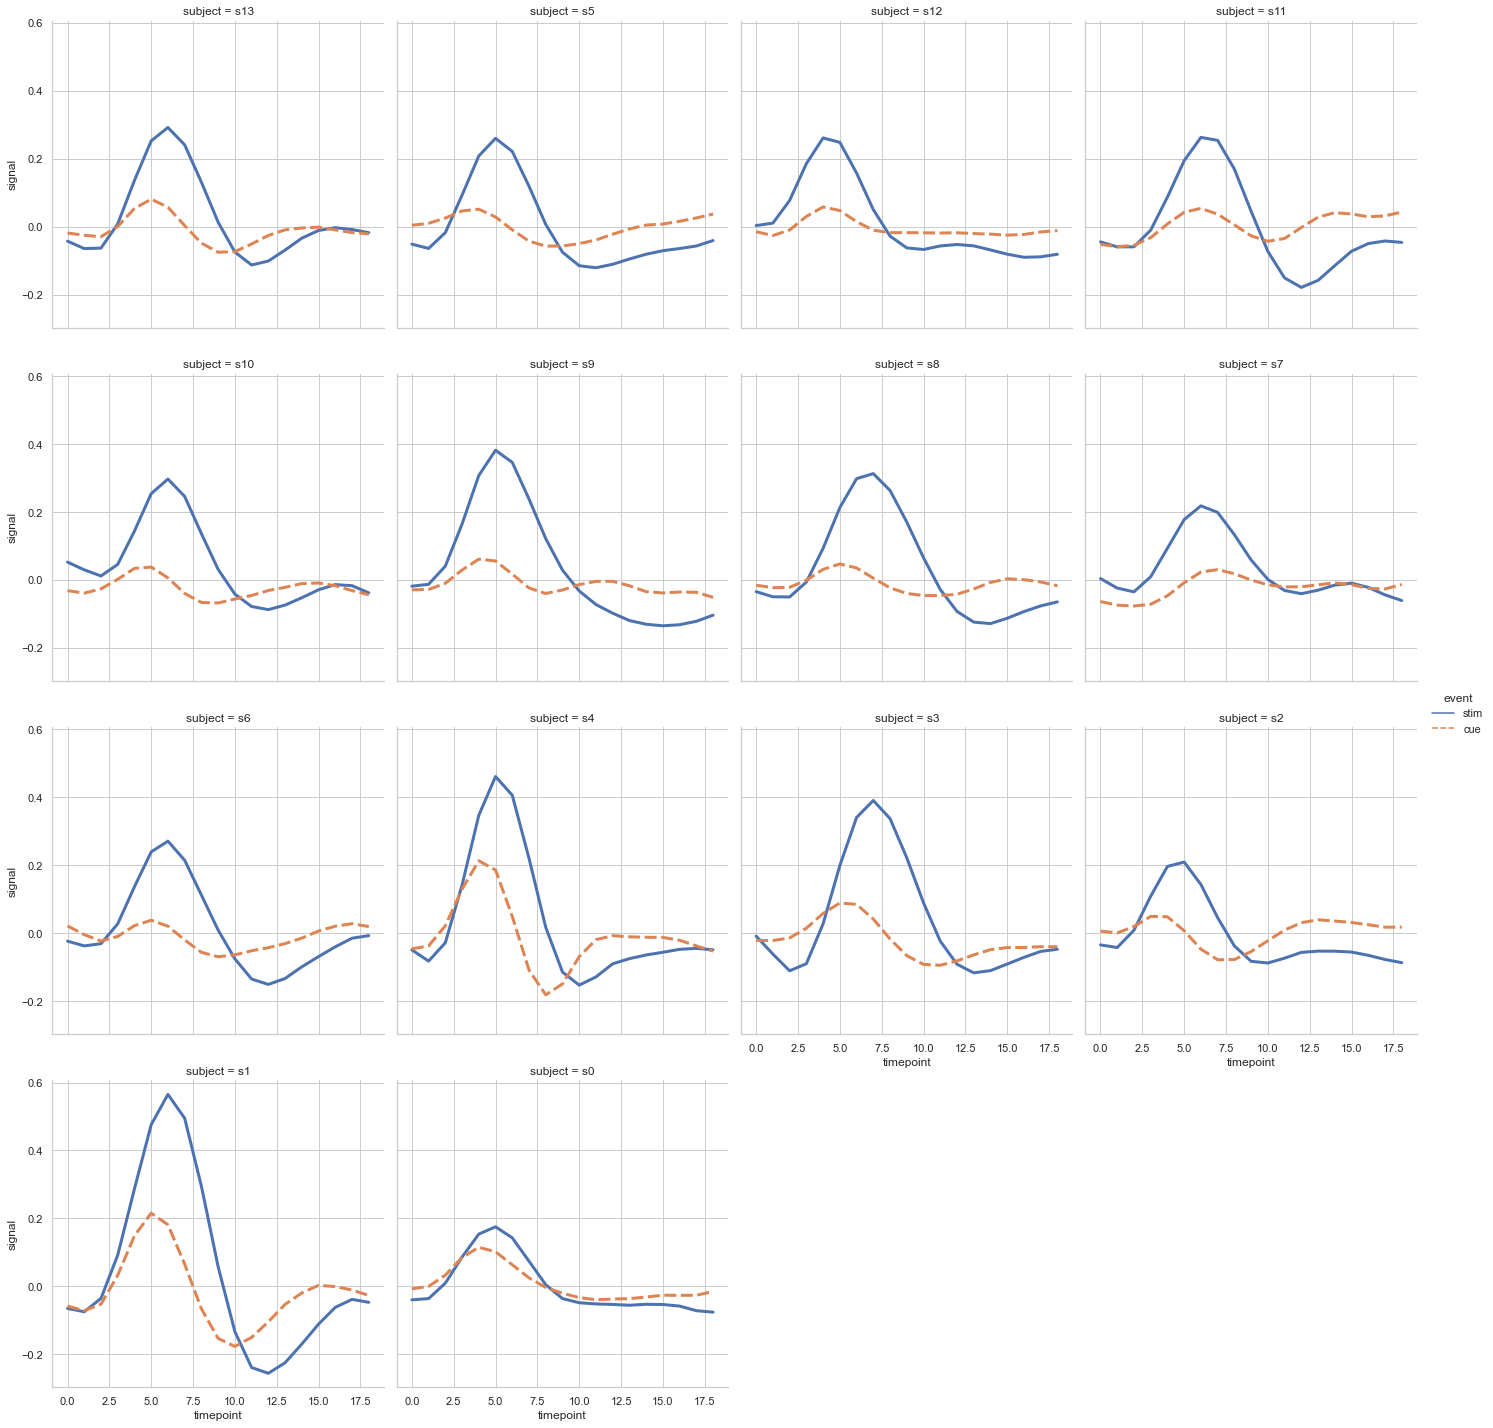

In [25]:
sns.relplot(x='timepoint', y='signal',
            hue='event', style='event',
            col='subject', col_wrap=4, linewidth=3,
           kind='line', data=fmri.query('region =="parietal"'));

In [26]:
tdf = pd.DataFrame(np.random.randn(40,4),
                  index=pd.date_range('2023-03-20', periods=40),
                   columns=['A','B','C','D'])
tdf

A         B         C         D
2023-03-20  1.785408  0.203217  0.657964  1.139566
2023-03-21 -0.123606  0.078915 -0.939314 -0.478097
2023-03-22 -0.584721  1.405548  0.405555  1.297681
2023-03-23  0.042282  0.350258 -0.772441  0.834068
2023-03-24  0.459806 -0.437149  0.330025 -1.700140
2023-03-25  0.192051 -0.331182 -1.505402  0.038479
2023-03-26 -0.206053 -1.091231  0.326512  1.693525
2023-03-27 -0.823748  1.944963  0.425490 -1.532565
2023-03-28 -0.753346  0.872233  0.877679 -0.286326
2023-03-29 -0.876720 -1.431340 -1.439762  0.774965
2023-03-30 -1.458679  1.436736  0.059215  1.389435
2023-03-31  0.118556 -0.785792  0.917977  0.996357
2023-04-01  0.412559 -1.452341  0.483413 -1.425607
2023-04-02  1.906426  0.424482  1.989999 -1.241873
2023-04-03 -1.012896 -1.061369 -1.305107  2.147714
2023-04-04  1.764024 -3.446753 -1.460037 -0.656075
2023-04-05  2.309911  0.658219 -0.960311  0.392920
2023-04-06  0.178402 -1.813109  2.077492 -1.125436
2023-04-07 -0.882790 -0.177516 -0.130960  0.656246
2023-04-08 -0.495613 -0.138333 -0.623382  0.442064
2023-04-09  1.187757  0.952372 -0.535573 -0.031715
2023-04-10 -1.752493 -0.617267 -2.708422 -0.366963
2023-04-11  1.427207  2.312364 -0.654389 -1.028963
2023-04-12  2.216905  0.831195 -0.830759  0.196570
2023-04-13  0.322337 -1.068055  1.245338 -1.449037
2023-04-14  0.473619 -0.051203  0.748458  0.564143
2023-04-15 -1.120647 -0.116996 -0.131921  0.504993
2023-04-16 -0.823696 -0.670723  1.857005 -0.145552
2023-04-17  0.966679 -1.339928 -1.584492 -0.455865
2023-04-18 -1.283303  0.882843  1.751115  0.108395
2023-04-19  1.160012 -0.824381 -0.156169 -1.360157
2023-04-20 -1.984802 -0.741585 -0.692493 -0.624324
2023-04-21 -1.068673  1.176301  0.534172 -0.430752
2023-04-22  1.822480 -1.020004  0.993089  0.966865
2023-04-23 -0.365671 -0.483717 -1.531240 -0.064787
2023-04-24 -2.110274  0.714145  0.622532 -1.020057
2023-04-25  0.400223 -1.547340 -1.063840  0.891939
2023-04-26 -0.384255 -0.712560  2.356783  0.044256
2023-04-27  0.201095  2.503474  0.077616  1.471423
2023-04-28  2.227420  0.077475 -0.066588  0.389815

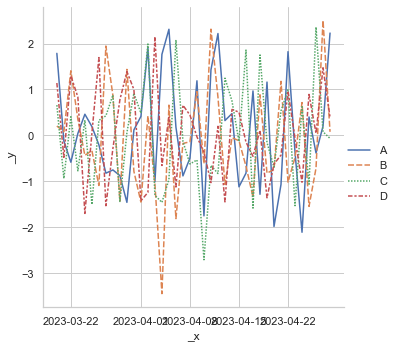

In [27]:
sns.relplot(kind='line', data=tdf);

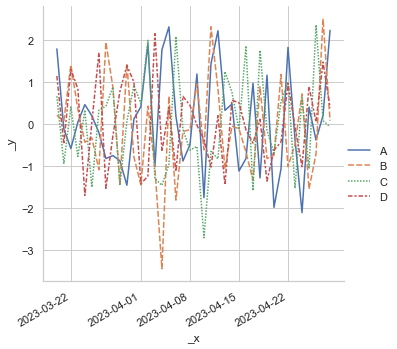

In [28]:
g = sns.relplot(kind='line', data=tdf)
g.fig.autofmt_xdate()

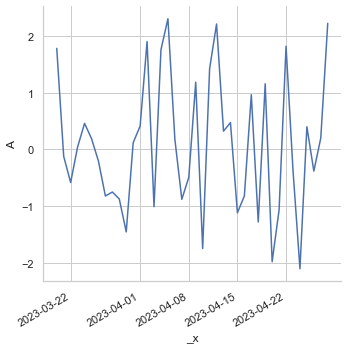

In [29]:
g = sns.relplot(kind='line', data=tdf['A'])
g.fig.autofmt_xdate()

## 범주형 산점도 (Categorical scatterplots)
- **stripplot()** (with kind='strip', the default)
- **swarmplot()** (with kind='swarm')

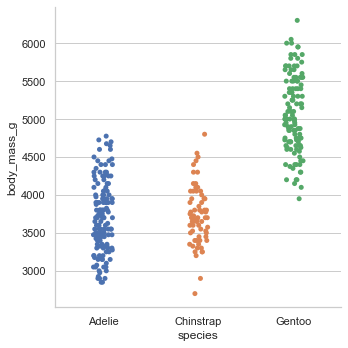

In [30]:
sns.catplot(x='species', y='body_mass_g', data=penguins);

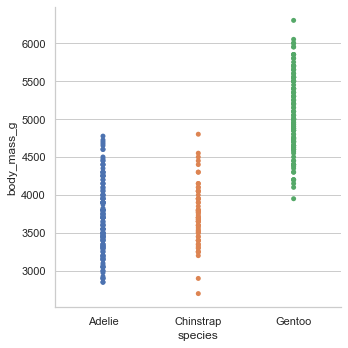

In [31]:
sns.catplot(x='species', y='body_mass_g',
            jitter=False, data=penguins);

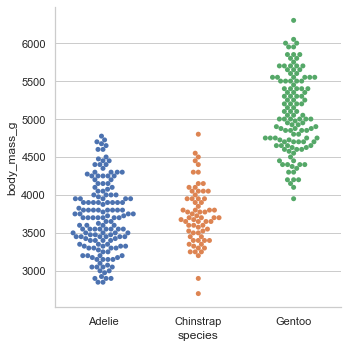

In [32]:
sns.catplot(x='species', y='body_mass_g',
            kind='swarm', data=penguins);

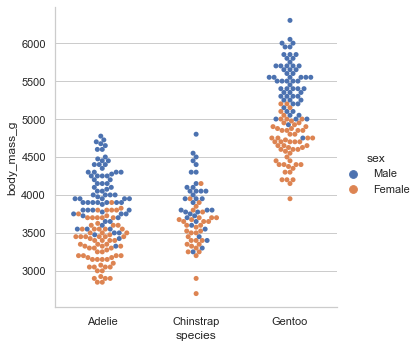

In [33]:
sns.catplot(x='species', y='body_mass_g',
            hue='sex',
            kind='swarm', data=penguins);

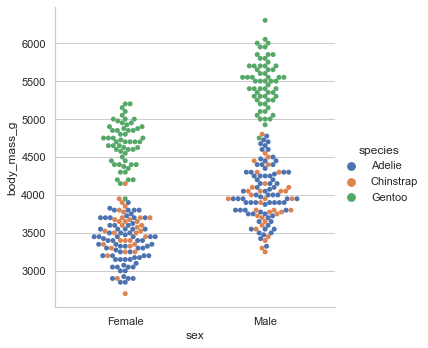

In [34]:
# 그려지는 순서 정하기
sns.catplot(x='sex', y='body_mass_g',
            hue='species', kind='swarm',
            order=['Female', 'Male'], data=penguins);

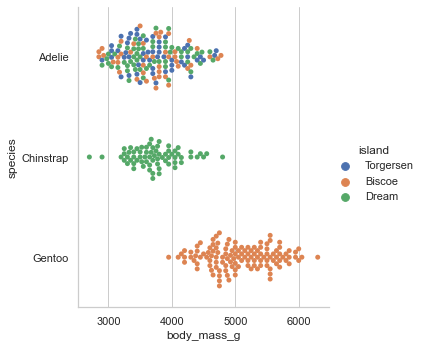

In [35]:
# x축에 수치형, y축에 범주형
sns.catplot(x='body_mass_g', y='species',
            hue='island', kind='swarm',
             data=penguins);

## 범주형 분포도 (Categorical distribution plots)
- **boxplot()** (with kind='box')
- **boxenplot()** (with kind='boxen')
- **violinplot()** (with kind='violin')

### 박스 플롯 (Box plots)

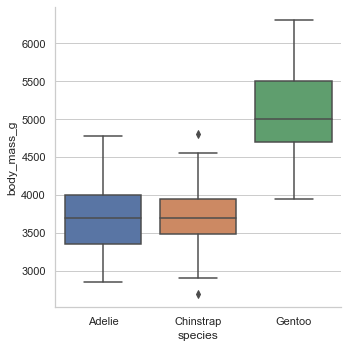

In [36]:
sns.catplot(x='species', y='body_mass_g',
           kind='box', data=penguins);

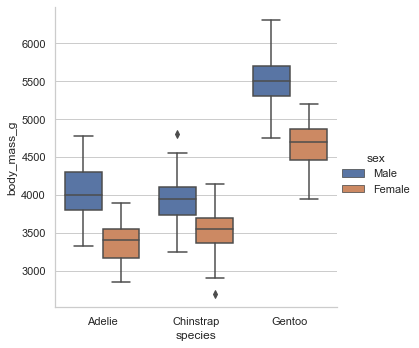

In [37]:
sns.catplot(x='species', y='body_mass_g',
           hue='sex', kind='box', data=penguins);

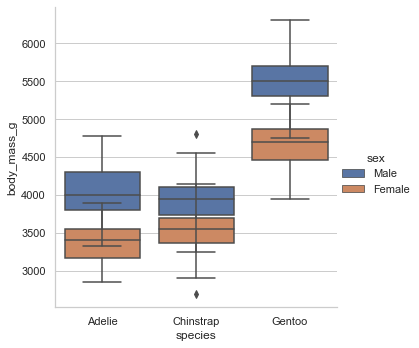

In [38]:
sns.catplot(x='species', y='body_mass_g',
           hue='sex', kind='box',
            dodge=False, data=penguins);

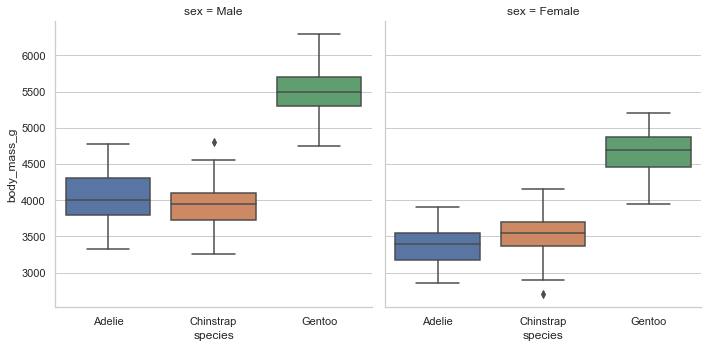

In [39]:
sns.catplot(x='species', y='body_mass_g',
           col='sex', kind='box',
            dodge=False, data=penguins);

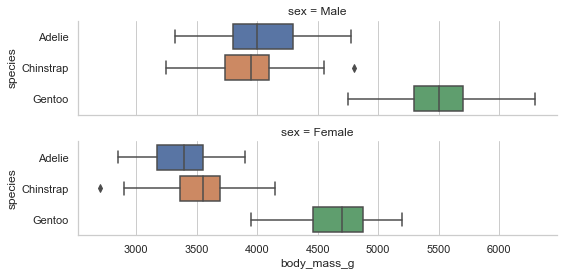

In [40]:
sns.catplot(x='body_mass_g', y='species',
            row='sex', kind='box',
           height=2, aspect=4,
            data=penguins);

### 박슨 플롯 (Boxen Plots)

In [41]:
diamonds = sns.load_dataset('diamonds')
diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

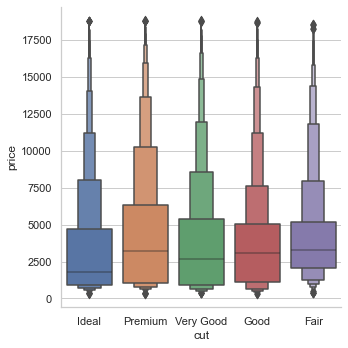

In [42]:
sns.catplot(x='cut',y='price',
           kind='boxen', data=diamonds);

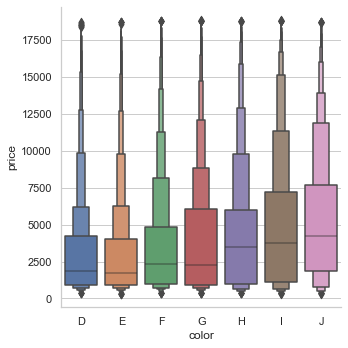

In [43]:
sns.catplot(x='color',y='price',
           kind='boxen', data=diamonds.sort_values('color'));

### 바이올린 플롯 (Violin Plots)
- **violinplot** : 커널 밀도 추정과 상자 도표 결합

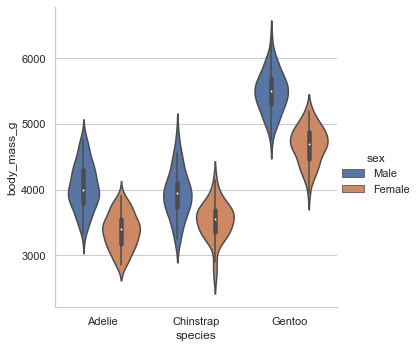

In [44]:
sns.catplot(x='species', y='body_mass_g',
           hue='sex', kind='violin', data=penguins);

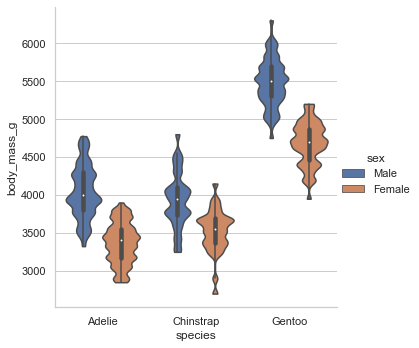

In [45]:
# 커널 이용
sns.catplot(x='species', y='body_mass_g',
           hue='sex', kind='violin',
            bw=.15, cut=0,
            data=penguins);

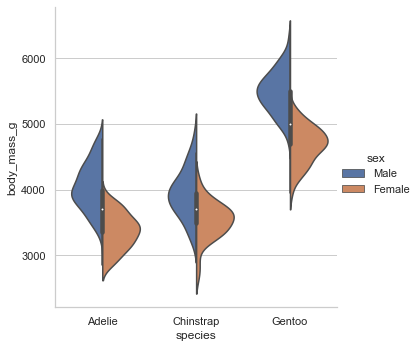

In [46]:
sns.catplot(x='species', y='body_mass_g',
           hue='sex', kind='violin',
            split=True, data=penguins);

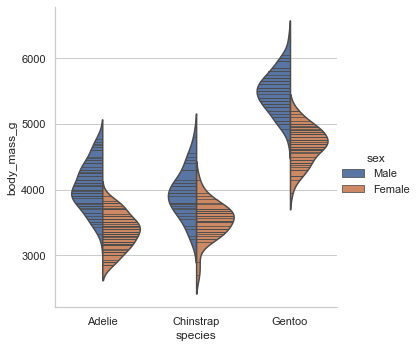

In [47]:
# inner 정보 바꾸기. (box -> stick)
sns.catplot(x='species', y='body_mass_g',
           hue='sex', kind='violin',
            inner='stick', split=True, data=penguins);

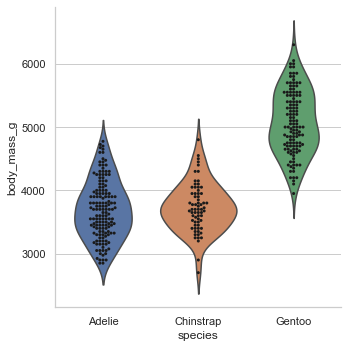

In [48]:
g = sns.catplot(x='species', y='body_mass_g',
               kind='violin',
               inner=None, data=penguins)
sns.swarmplot(x='species', y='body_mass_g',
             color='k', size=3,
             data=penguins, ax=g.ax);

## 범주형 추정치 도표 (Categorical estimate plots)
- **barplot()** (with kind='bar')
- **pointplot()** (with kind='point')
- **countplot()** (with kind='count') 

### 막대 플롯 (Bar plot)

In [49]:
mpg = sns.load_dataset('mpg')
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

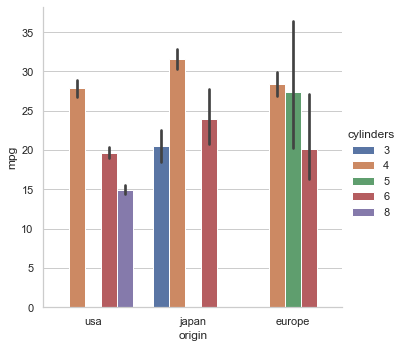

In [50]:
sns.catplot(x='origin', y='mpg',
           hue='cylinders', kind='bar',
           data=mpg);

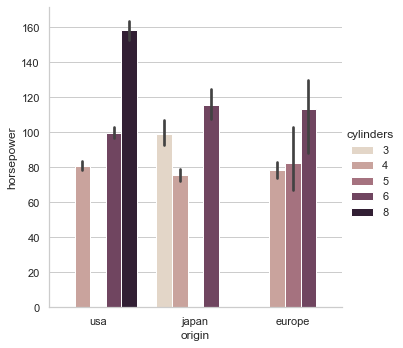

In [51]:
sns.catplot(x='origin', y='horsepower',
           hue='cylinders', kind='bar',
           palette='ch:.20', data=mpg);

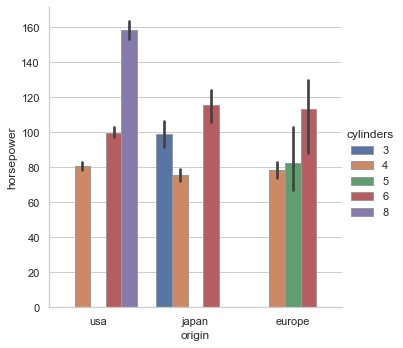

In [52]:
# 테두리 색깔 선명하게
sns.catplot(x='origin', y='horsepower',
           hue='cylinders', kind='bar',
           edgecolor='.6', data=mpg);

### 포인트 플롯(Point plots)
- 축의 높이를 사용하여 추정값을 인코딩하여 점 추정값과 신뢰구간 표시

In [53]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

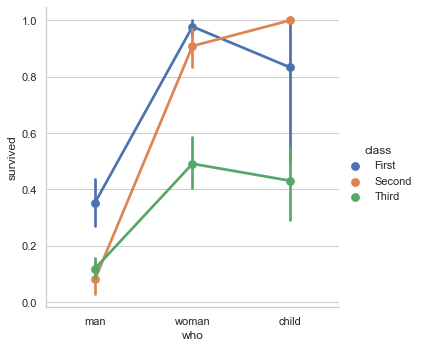

In [54]:
sns.catplot(x='who', y='survived',
           hue='class', kind='point',
           data=titanic);

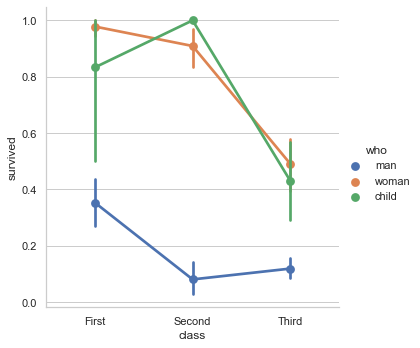

In [55]:
sns.catplot(x='class', y='survived',
           hue='who', kind='point',
           data=titanic);

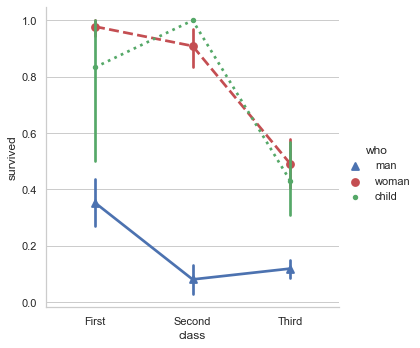

In [56]:
sns.catplot(x='class', y='survived', hue='who',
            palette={'man':'b', 'woman':'r', 'child':'g'},
            markers=['^','o','.'], linestyles=['-','--',':'],
            kind='point', data=titanic);

### 카운트 플롯 (Count plots)

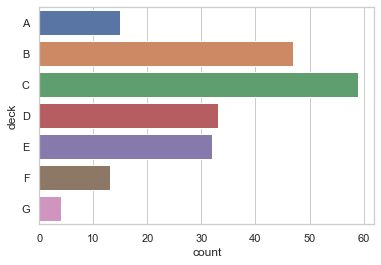

In [57]:
sns.countplot(y='deck',data=titanic);

## 분포 시각화 (Distribution Visualization)

### 일변량 분포 (Univariate distributions)

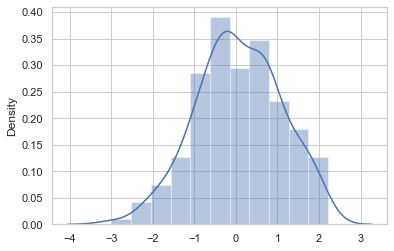

In [58]:
x = np.random.randn(200)
sns.distplot(x);

#### 히스토그램 (Histograms)

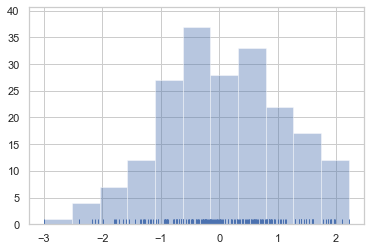

In [59]:
sns.distplot(x, kde=False, rug=True);

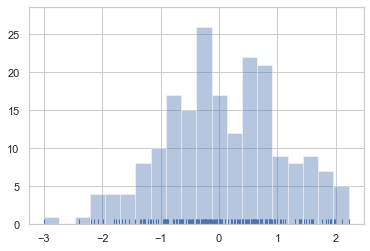

In [60]:
sns.distplot(x, bins=20, kde=False, rug=True);

#### 커널 밀도 추정 (Kernel density estimation)

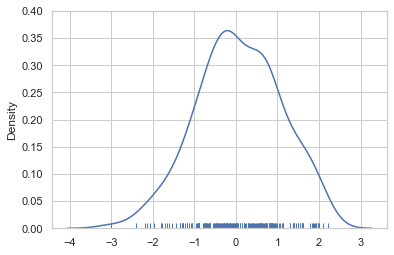

In [61]:
sns.distplot(x, hist=False, rug=True);

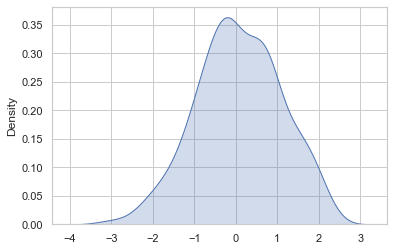

In [62]:
sns.kdeplot(x, shade=True);

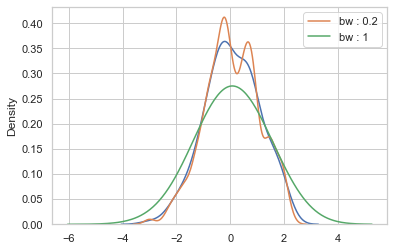

In [63]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label='bw : 0.2')
sns.kdeplot(x, bw=1, label='bw : 1')
plt.legend();

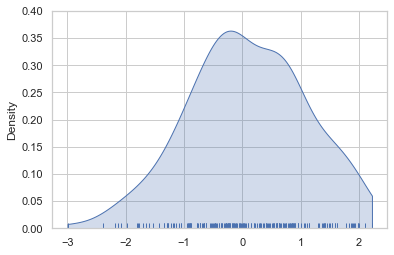

In [64]:
# cut은 극단값 관련 매개변수
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

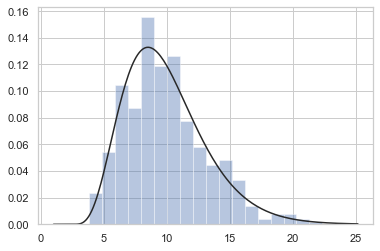

In [65]:
x = np.random.gamma(10, size=500)
sns.distplot(x, kde=False, fit=stats.gamma);

## 이변량 분포 (Bivariate distributions)

### 산점도 (Scatter plots)
- **jointplot** : 두 개의 변수 간의 이변량(또는 joint) 관계와 별도의 축에 각각의 일변량(또는 marginal) 분포가 모두 표시되는 다중 패널 플롯 생성

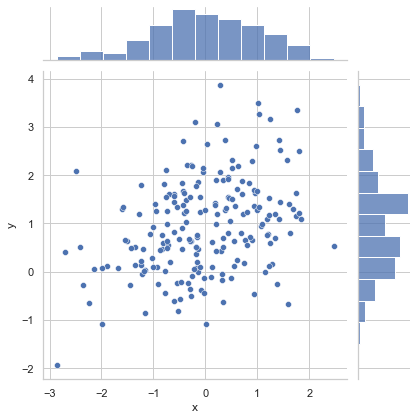

In [66]:
mean = [0,1]
cov = [(1, .3), (.3, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x','y'])

sns.jointplot(x='x', y='y', data=df)

### 육각 빈 플롯 (Hexbin plots)

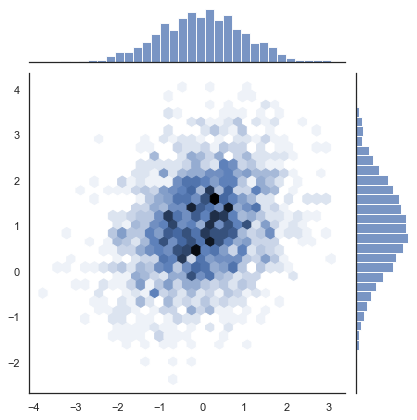

In [67]:
x, y = np.random.multivariate_normal(mean, cov, 2000).T
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='hex')

### 커널 밀도 추정 (Kernel density estimation)

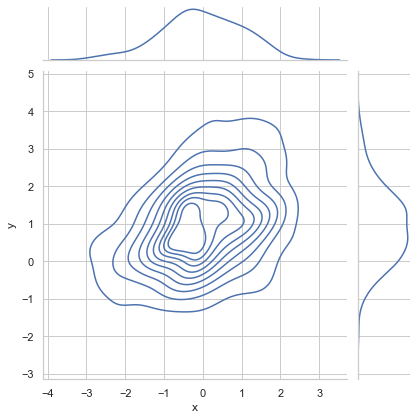

In [68]:
sns.jointplot(x='x', y='y', data=df, kind='kde');

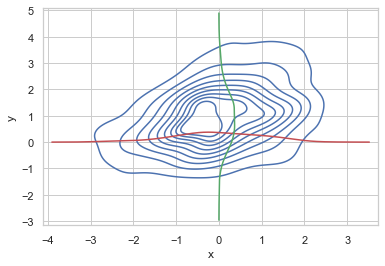

In [69]:
sns.kdeplot(df.x, df.y)
sns.kdeplot(df.x, color='r')
sns.kdeplot(df.y, color='g', vertical=True);

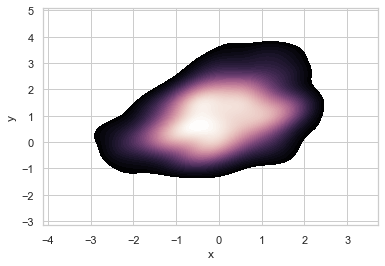

In [70]:
cmap = sns. cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

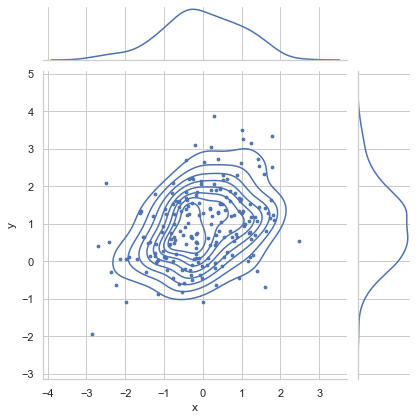

In [71]:
g = sns.jointplot(x='x', y='y', data=df, kind='kde')
g.plot_joint(plt.scatter, s=30, linewidth=1, marker='.')
g.ax_joint.collections[0].set_alpha(0)

### 페어와이즈 관계 시각화 (Visualizing pairwise relationships)

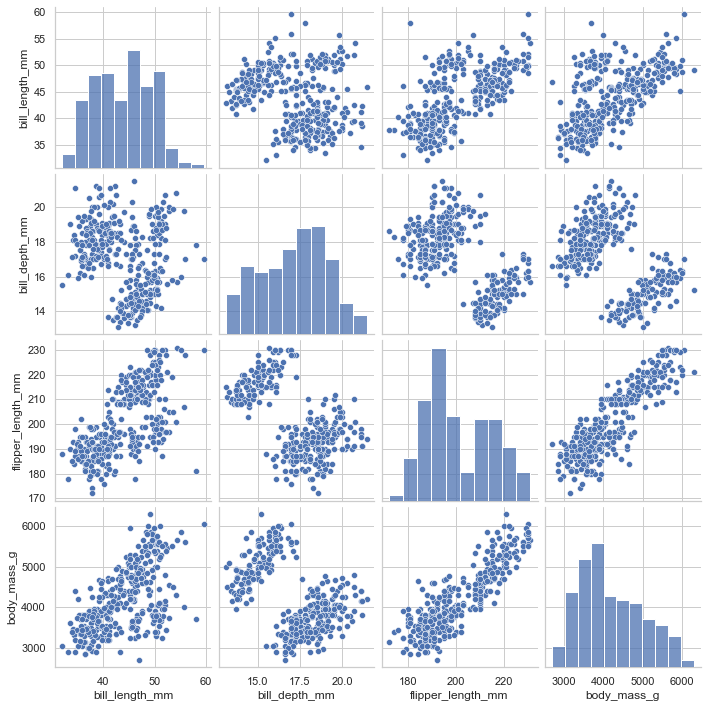

In [72]:
sns.pairplot(penguins);

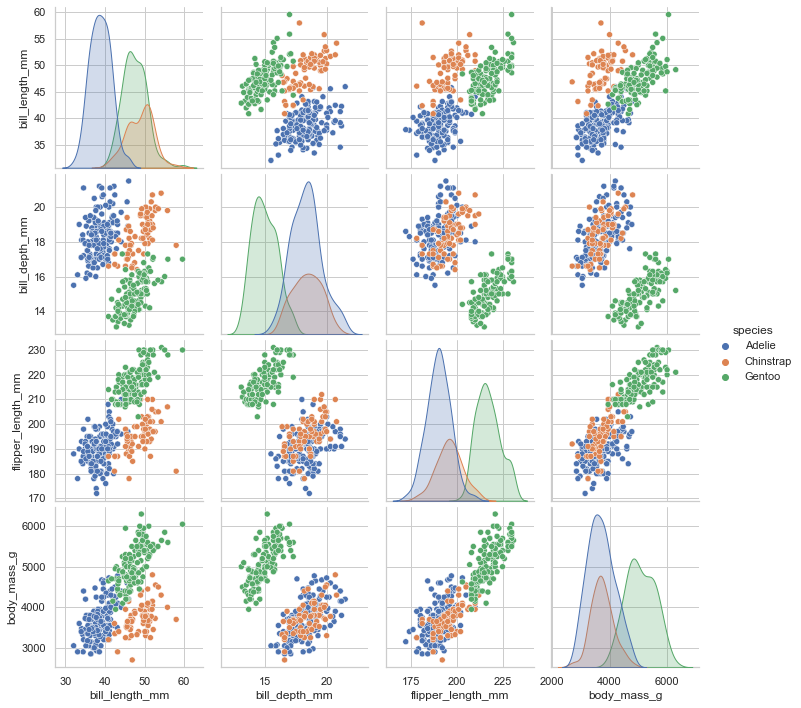

In [73]:
sns.pairplot(penguins, hue='species');

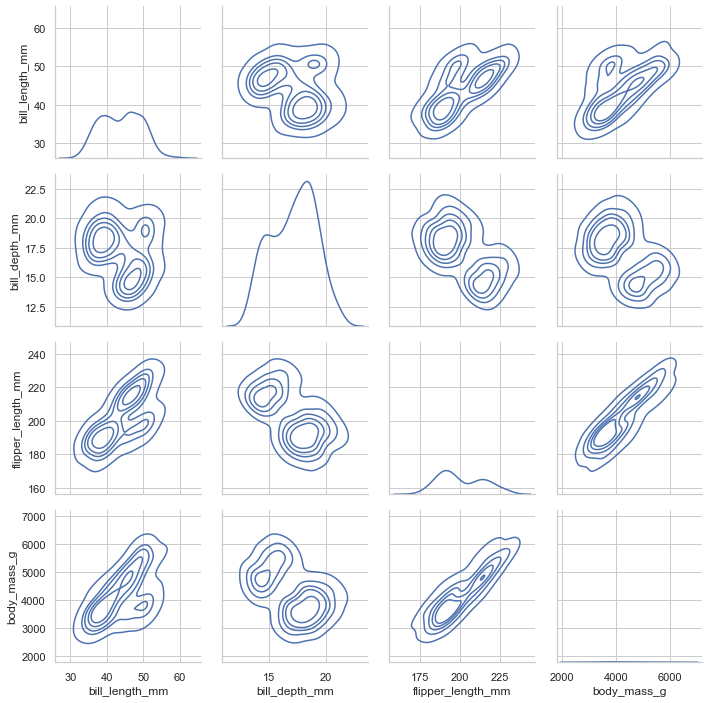

In [74]:
g = sns.PairGrid(penguins)
# scatter 대신 kde
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

### 히트맵(Heat Map) & 클러스터맵(Cluster Map)

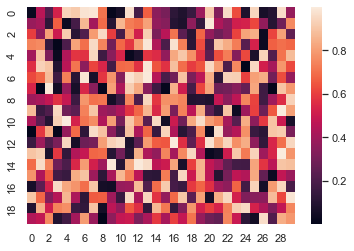

In [75]:
udata = np.random.rand(20,30)
sns.heatmap(udata);

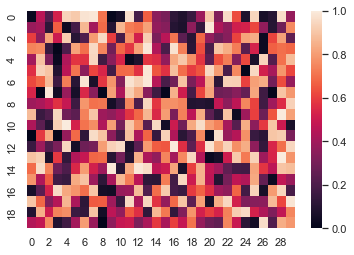

In [76]:
# vertical 0과 1 사이로
sns.heatmap(udata, vmin=0, vmax=1);

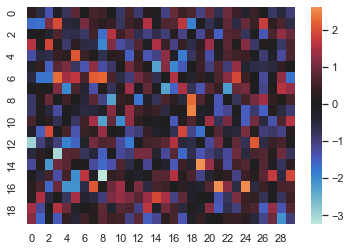

In [77]:
# 기준이 0이 될 수 있게
ndata = np.random.randn(20,30)
sns.heatmap(ndata, center=0);

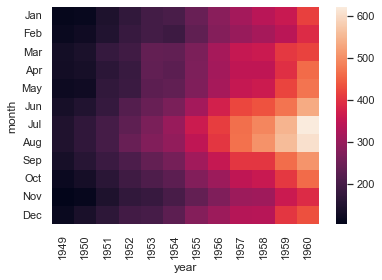

In [78]:
flights = flights.pivot('month','year','passengers')
sns.heatmap(flights);

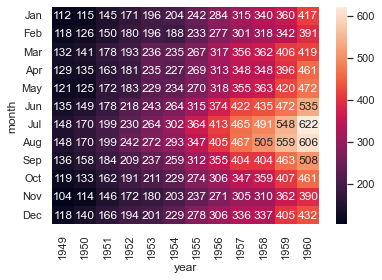

In [79]:
sns.heatmap(flights, annot=True, fmt='d');

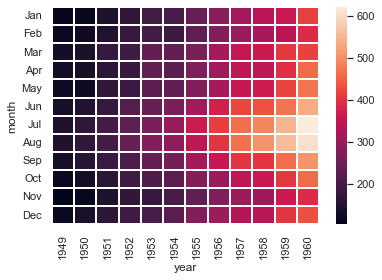

In [80]:
sns.heatmap(flights, linewidth=0.2);

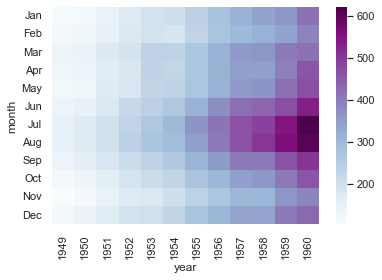

In [81]:
sns.heatmap(flights, cmap='BuPu');

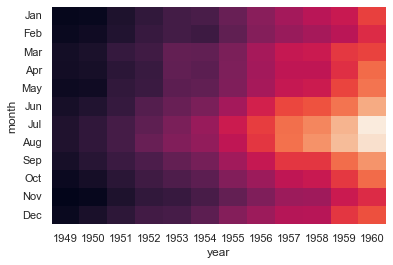

In [82]:
sns.heatmap(flights, cbar=False);

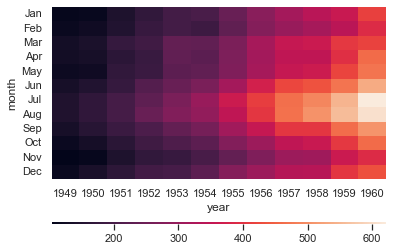

In [83]:
grid_kws = {'height_ratios':(.9, 0.01), 'hspace':.5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
                cbar_ax=cbar_ax,
                cbar_kws={'orientation':'horizontal'})

### 선형 관계 시각화 (Visualizing linear relationships)

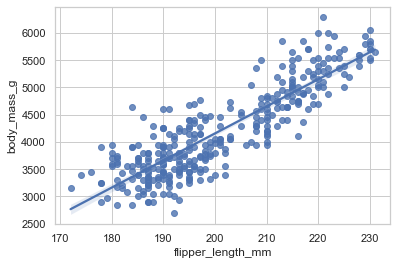

In [84]:
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=penguins);

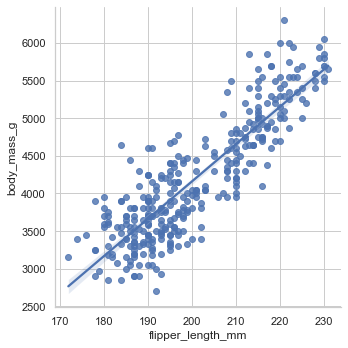

In [85]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=penguins);

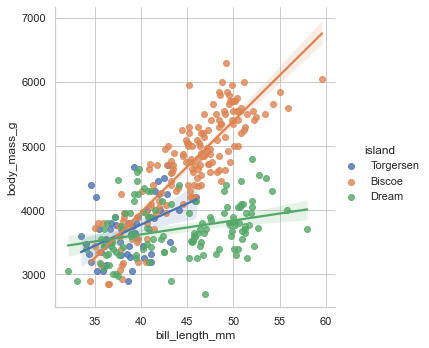

In [86]:
sns.lmplot(x='bill_length_mm', y='body_mass_g',
           hue='island', data=penguins);

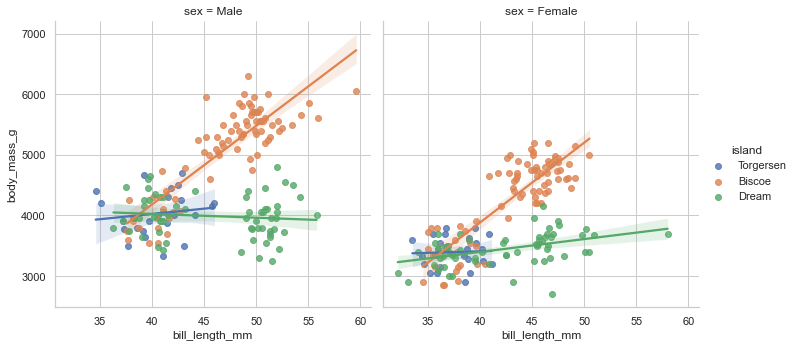

In [87]:
sns.lmplot(x='bill_length_mm', y='body_mass_g',
           col='sex', hue='island', data=penguins);

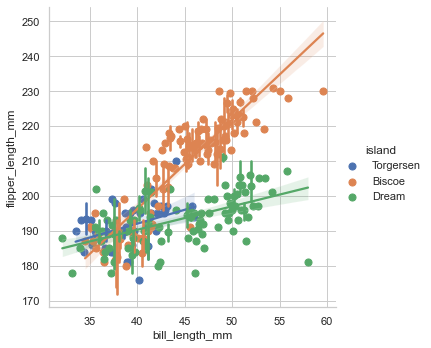

In [88]:
sns.lmplot(x='bill_length_mm', y='flipper_length_mm',
           hue='island', x_estimator=np.mean, data=penguins);

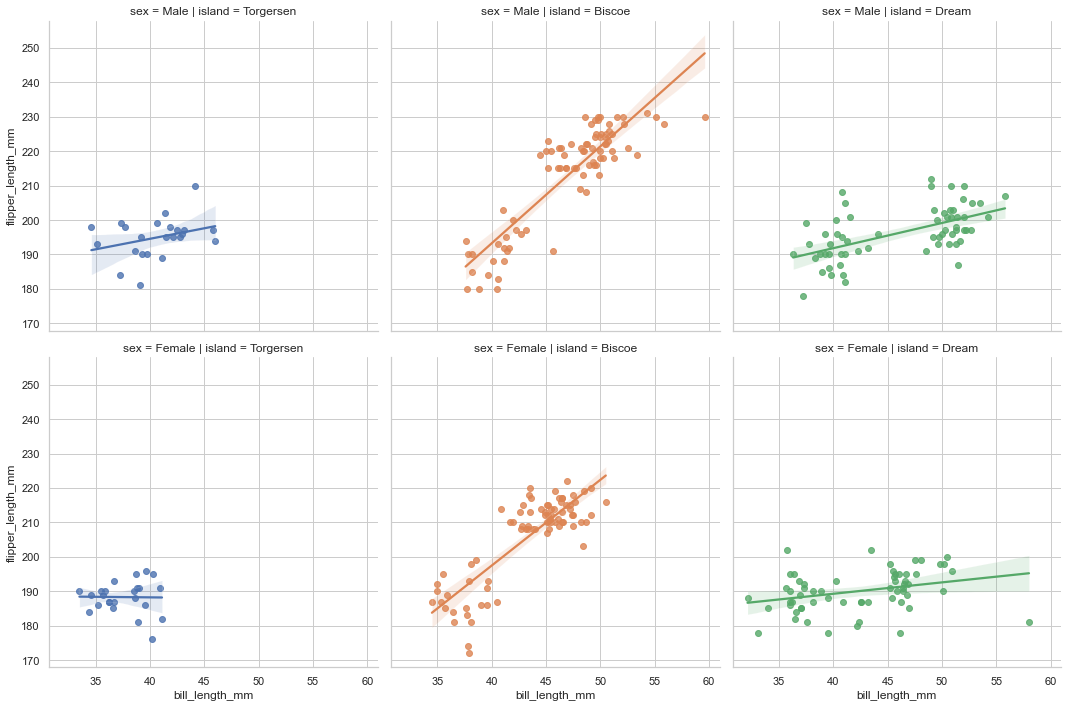

In [89]:
sns.lmplot(x='bill_length_mm', y='flipper_length_mm',
           hue='island', col='island', row='sex', data=penguins);

### 다른 종류의 모델

In [91]:
anscombe = sns.load_dataset('anscombe')
anscombe.describe()

x          y
count  44.000000  44.000000
mean    9.000000   7.500682
std     3.198837   1.958925
min     4.000000   3.100000
25%     7.000000   6.117500
50%     8.000000   7.520000
75%    11.000000   8.747500
max    19.000000  12.740000

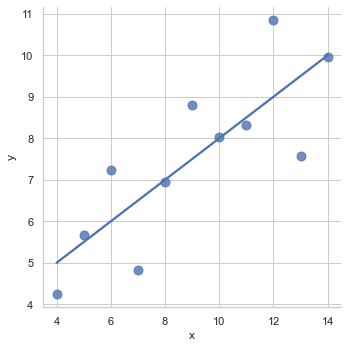

In [92]:
sns.lmplot(x='x',y='y',data=anscombe.query('dataset == "I"'),
          ci=None, scatter_kws={'s':80});

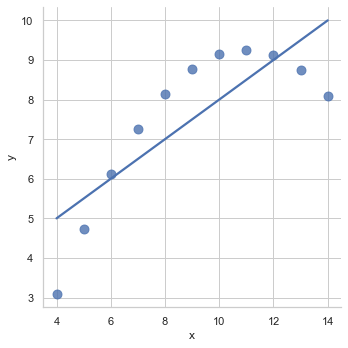

In [93]:
sns.lmplot(x='x',y='y',data=anscombe.query('dataset == "II"'),
          ci=None, scatter_kws={'s':80});

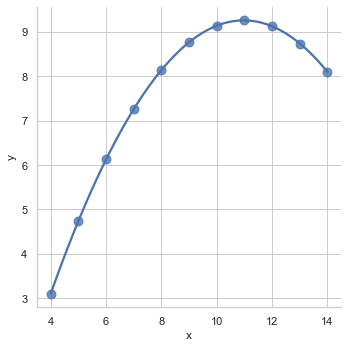

In [95]:
# 비선형 그려보기
sns.lmplot(x='x',y='y',data=anscombe.query('dataset == "II"'),
          order=2, ci=None, scatter_kws={'s':80});

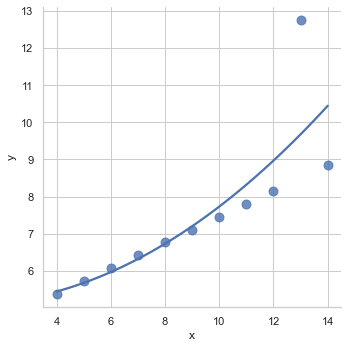

In [96]:
sns.lmplot(x='x',y='y',data=anscombe.query('dataset == "III"'),
          order=2, ci=None, scatter_kws={'s':80});

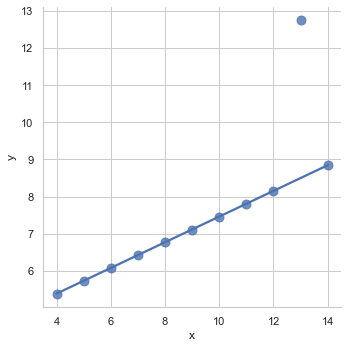

In [97]:
sns.lmplot(x='x',y='y',data=anscombe.query('dataset == "III"'),
          robust=True, ci=None, scatter_kws={'s':80});

In [98]:
penguins['long_bill'] = (penguins.bill_length_mm > penguins['bill_length_mm'].mean())

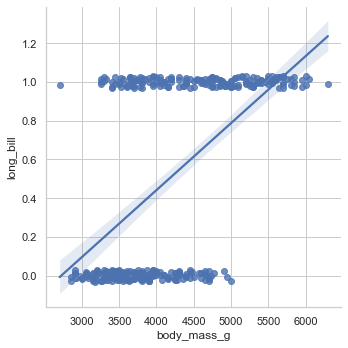

In [99]:
sns.lmplot(x='body_mass_g', y='long_bill',
          y_jitter=.03, data=penguins);

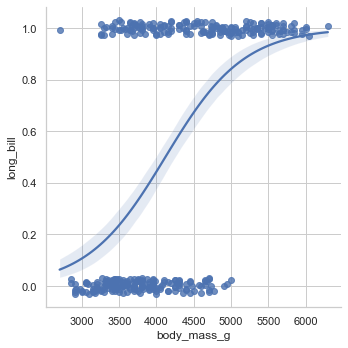

In [100]:
# linear가 아닌 logistic 형태로
sns.lmplot(x='body_mass_g', y='long_bill',
          logistic=True, y_jitter=.03, data=penguins);

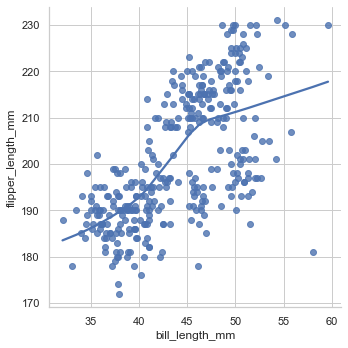

In [104]:
# smooth 하게 꺽여라
sns.lmplot(x='bill_length_mm', y='flipper_length_mm',
          lowess=True, data=penguins);

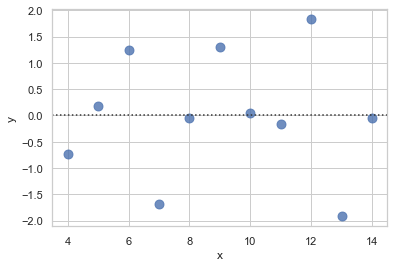

In [105]:
# 잔차(residuals) 그래프
sns.residplot(x='x',y='y', data=anscombe.query('dataset =="I"'),
             scatter_kws={'s':80});

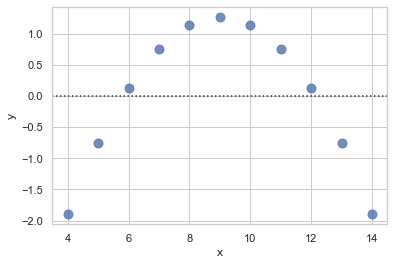

In [103]:
sns.residplot(x='x',y='y', data=anscombe.query('dataset =="II"'),
             scatter_kws={'s':80});

### 다른 상황의 회귀

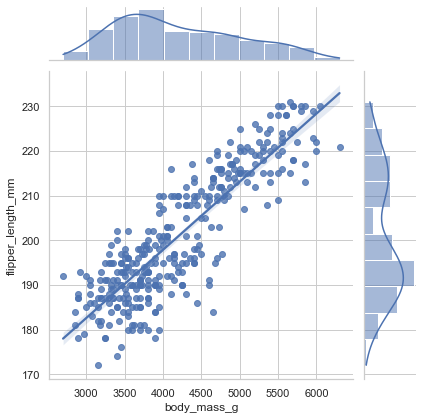

In [106]:
sns.jointplot(x='body_mass_g', y='flipper_length_mm',
             kind='reg', data=penguins);

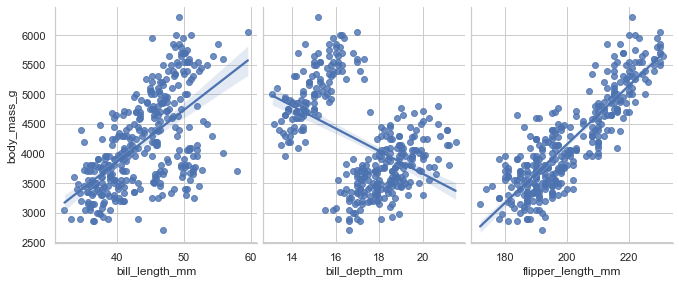

In [110]:
sns.pairplot(penguins,
            x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
            y_vars=['body_mass_g'],
            height=4, aspect=.8,
            kind='reg');

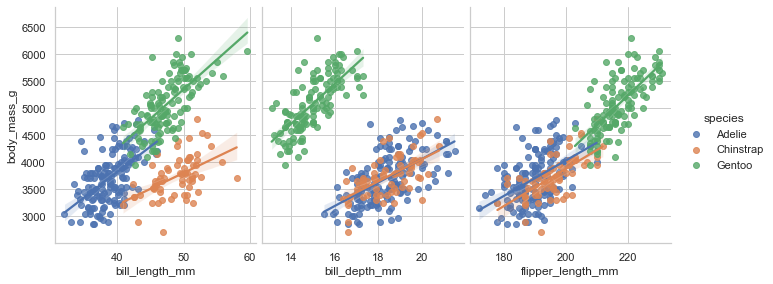

In [112]:
sns.pairplot(penguins,
            x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
            y_vars=['body_mass_g'],
            hue='species',
            height=4, aspect=.8,
            kind='reg');

## 구조화된 다중 플롯 그리드

### FacetGrid

In [113]:
sns.set(style='ticks')

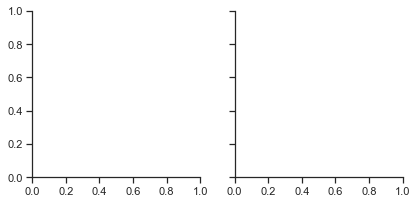

In [114]:
g = sns.FacetGrid(penguins, col='sex')

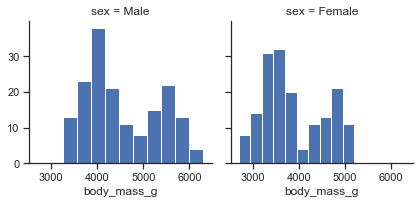

In [115]:
g = sns.FacetGrid(penguins, col='sex')
g.map(plt.hist, 'body_mass_g');

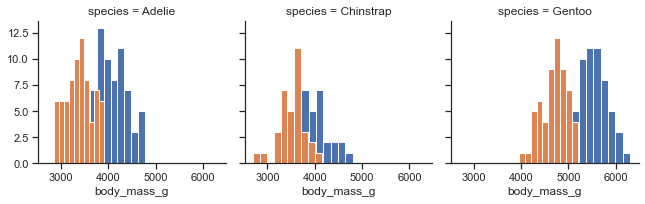

In [117]:
g = sns.FacetGrid(penguins, col='species',hue='sex')
g.map(plt.hist, 'body_mass_g');

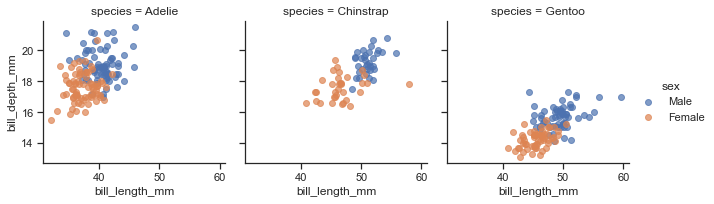

In [118]:
g = sns.FacetGrid(penguins, col='species',hue='sex')
g.map(plt.scatter, 'bill_length_mm','bill_depth_mm', alpha=.7);
g.add_legend();

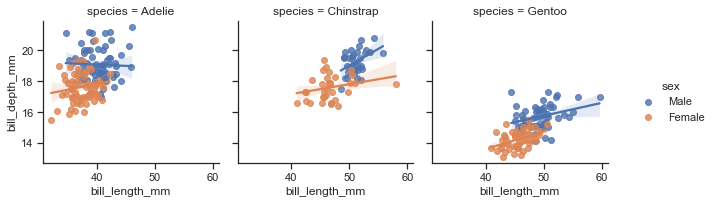

In [119]:
g = sns.FacetGrid(penguins, col='species',hue='sex', margin_titles=True)
g.map(sns.regplot, 'bill_length_mm','bill_depth_mm');
g.add_legend();

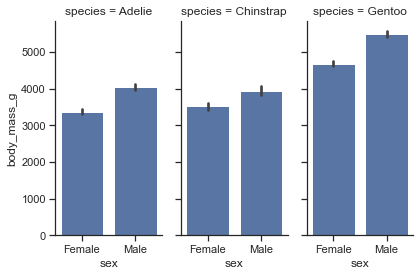

In [120]:
g = sns.FacetGrid(penguins, col='species', height=4, aspect=.5)
g.map(sns.barplot, 'sex','body_mass_g', order=['Female','Male']);

In [121]:
tips = sns.load_dataset('tips')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

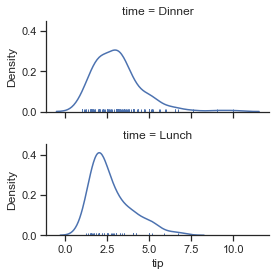

In [125]:
ordered_times = tips.time.value_counts().index
g = sns.FacetGrid(tips, row='time', row_order=ordered_times,
                 height=2, aspect=2)
g.map(sns.distplot, 'tip', hist=False, rug=True);

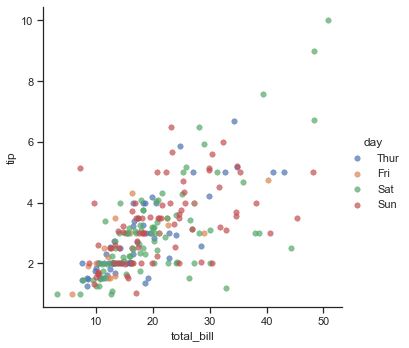

In [128]:
g = sns.FacetGrid(tips, hue='day', height=5)
g.map(plt.scatter, 'total_bill','tip', s=30, alpha=.7, linewidth=.5);
g.add_legend();

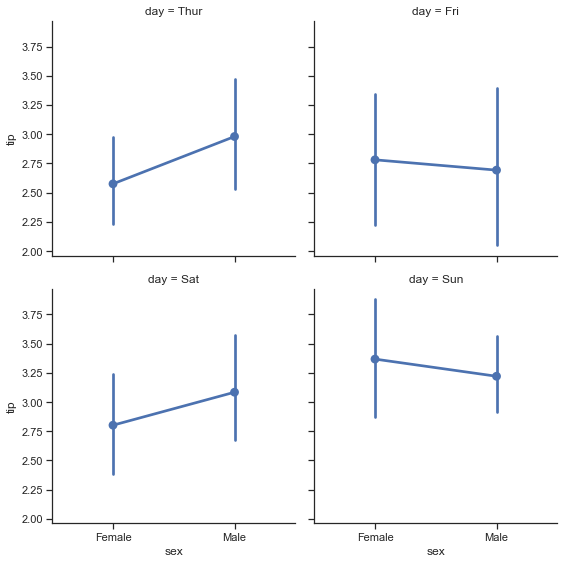

In [129]:
g = sns.FacetGrid(tips, col='day', col_wrap=2, height=4)
g.map(sns.pointplot, 'sex', 'tip', order=['Female','Male']);

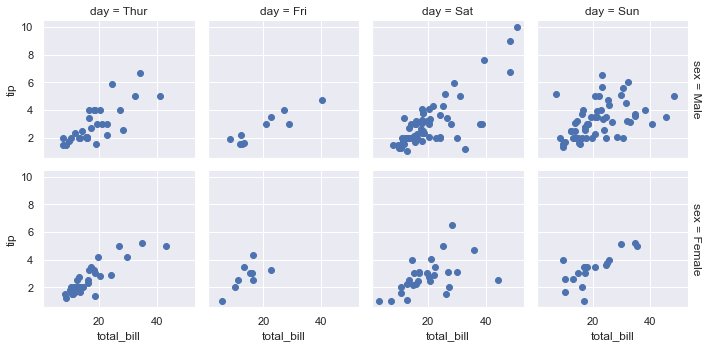

In [130]:
with sns.axes_style('darkgrid'):
    g = sns.FacetGrid(tips, row='sex',col='day', margin_titles=True, height=2.5)
g.map(plt.scatter, 'total_bill','tip');

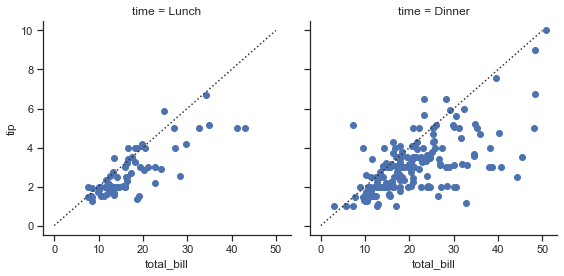

In [131]:
g = sns.FacetGrid(tips, col='time', margin_titles=True, height=4)
g.map(plt.scatter, 'total_bill', 'tip')
for ax in g.axes.flat:
    ax.plot((0,50),(0,.2*50), c='.2',ls=':');

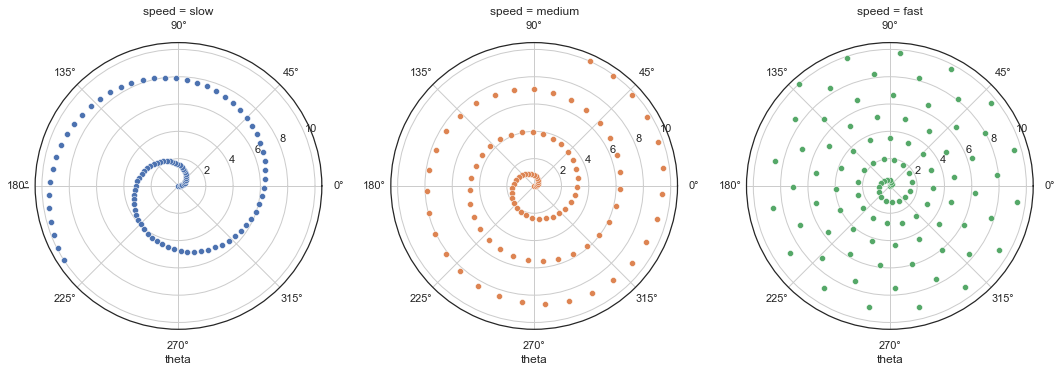

In [133]:
r = np.linspace(0,10,num=100)
df = pd.DataFrame({'r': r, 'slow' : r, 'medium' : 2*r, 'fast' : 4*r})
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

g = sns.FacetGrid(df, col='speed', hue='speed',
                 subplot_kws=dict(projection='polar'), height=5,
                 sharex=False, sharey=False, despine=False)
g.map(sns.scatterplot, 'theta', 'r');

## 커스텀 함수 (Custom functions)

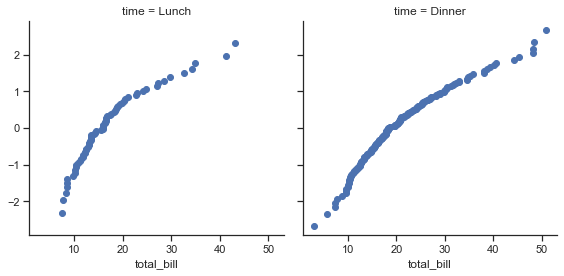

In [134]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    
g = sns.FacetGrid(tips, col='time', height=4)
g.map(quantile_plot, 'total_bill');

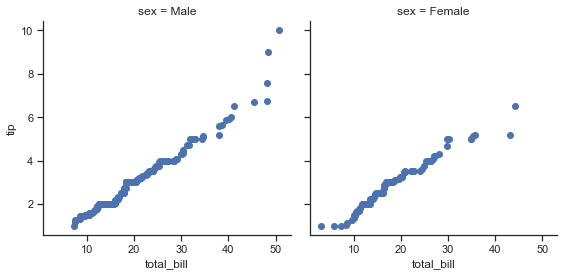

In [135]:
def qqplot(x,y,**kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr,yr, **kwargs)
    
g = sns.FacetGrid(tips, col='sex', height=4)
g.map(qqplot, 'total_bill', 'tip');

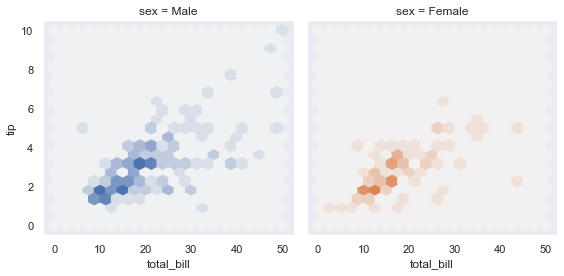

In [137]:
def hexbin(x,y,color,**kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y, gridsize=20, cmap=cmap, **kwargs)
    
with sns.axes_style('dark'):
    g = sns.FacetGrid(tips, hue='sex', col='sex', height=4)
g.map(hexbin, 'total_bill', 'tip', extent=[0,50,0,10]);

## 페어와이즈 데이터 관계 (Pairwise data relationships)

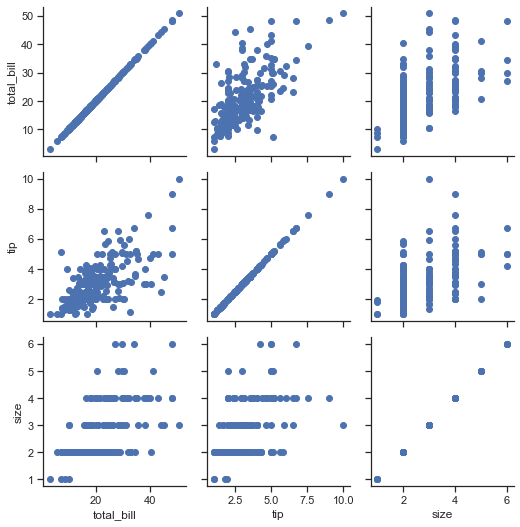

In [138]:
g = sns.PairGrid(tips)
g.map(plt.scatter);

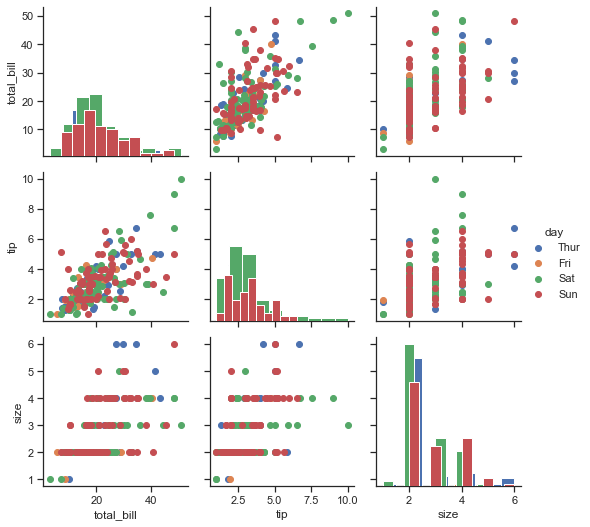

In [140]:
g = sns.PairGrid(tips, hue='day')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

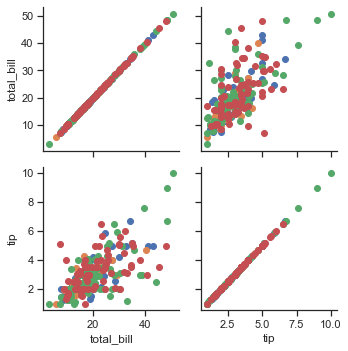

In [141]:
g = sns.PairGrid(tips, vars=['total_bill','tip'], hue='day')
g.map(plt.scatter);

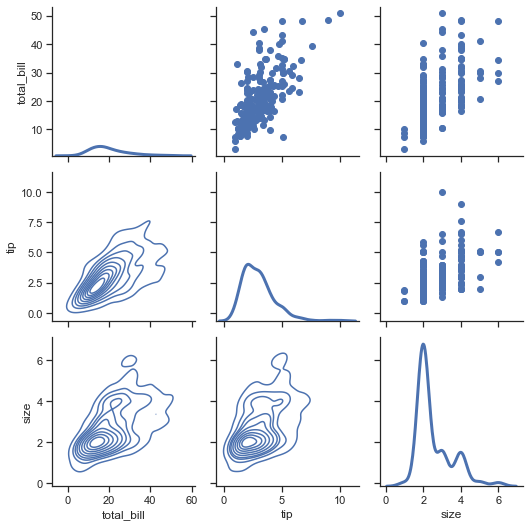

In [142]:
g = sns.PairGrid(tips)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

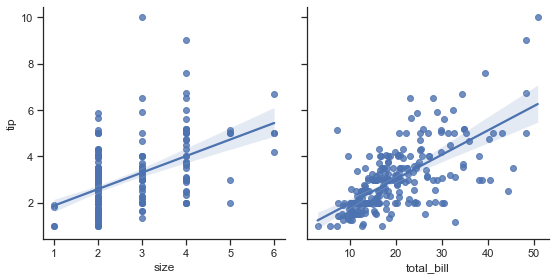

In [143]:
g = sns.PairGrid(tips, y_vars=['tip'],
                x_vars=['size','total_bill'], height=4)
g.map(sns.regplot);

## Seaborn 스타일

In [144]:
def randplot(flip=1):
    for i in range(1,7):
        plt.plot(np.random.randn(50).cumsum());

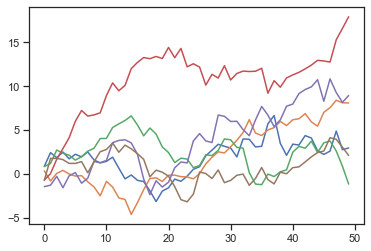

In [145]:
randplot();

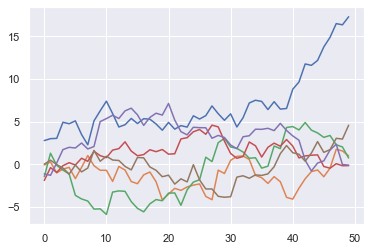

In [146]:
sns.set()
randplot();

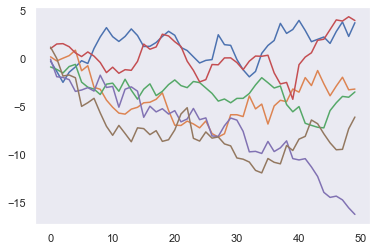

In [147]:
sns.set_style('dark')
randplot();

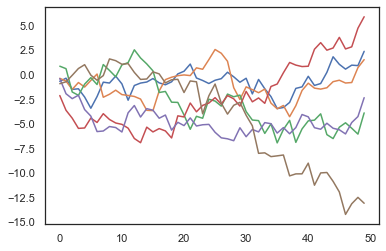

In [148]:
sns.set_style('white')
randplot();

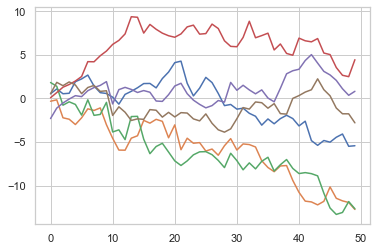

In [151]:
sns.set_style('whitegrid')
randplot();

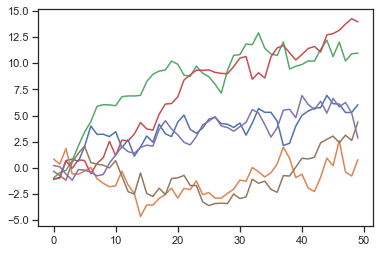

In [150]:
sns.set_style('ticks')
randplot();

### 축 스핀 제거

In [156]:
d = np.random.randn(50).reshape(10,5)
d

array([[-1.1885658 ,  0.864458  ,  0.37058367,  1.33272963,  1.43878144],
       [-0.68591747,  1.42131665, -1.28270055,  0.127554  , -1.98703227],
       [ 1.77930788,  0.19282572,  0.69100351,  1.68262915,  1.52943832],
       [ 1.02389507,  0.42524426, -1.44174196, -1.36057424,  0.887778  ],
       [-0.55133525,  0.0209703 , -1.08695394,  0.8188291 , -1.07673822],
       [-0.88059631, -0.06148211,  0.95350465,  1.31952317, -0.80323217],
       [-0.94104686,  0.78841038, -0.85631353, -0.06994727,  1.33759804],
       [ 2.27400684, -0.31263966,  0.07544371,  0.81561313,  0.40704466],
       [ 2.35744076, -1.98304311,  0.93158069,  1.45311456, -0.7624041 ],
       [-0.1174709 ,  0.54630249, -0.30799624, -0.89511948, -0.87843253]])

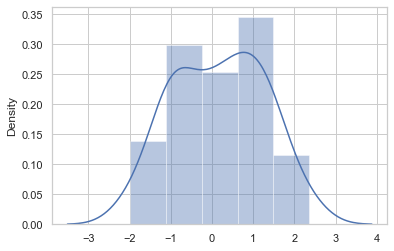

In [157]:
sns.distplot(d);

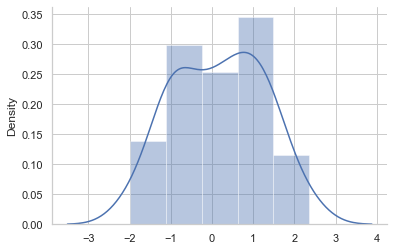

In [158]:
sns.distplot(d)
sns.despine()

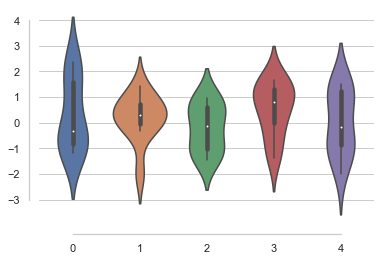

In [159]:
sns.violinplot(data=d)
sns.despine(offset=10, trim=True);

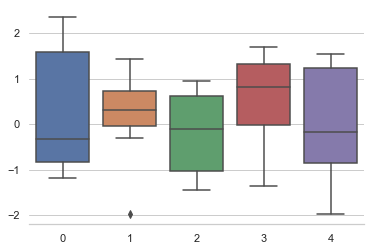

In [160]:
sns.boxplot(data=d, palette='deep')
sns.despine(left=True);

### 스타일 임시 설정
- **with 구문**

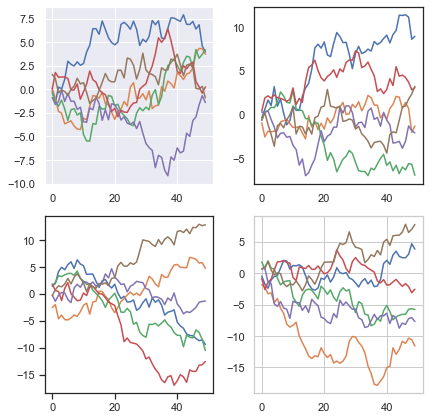

In [162]:
f = plt.figure(figsize=(6,6))
gs = f.add_gridspec(2,2)

with sns.axes_style('darkgrid'):
    ax = f.add_subplot(gs[0,0])
    randplot()

with sns.axes_style('white'):
    ax = f.add_subplot(gs[0,1])
    randplot()
    
with sns.axes_style('ticks'):
    ax = f.add_subplot(gs[1,0])
    randplot()
    
with sns.axes_style('whitegrid'):
    ax = f.add_subplot(gs[1,1])
    randplot()
    
f.tight_layout();

### 스타일 요소 재정의

In [163]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

### 스케일링 플롯 요소

In [164]:
sns.set()

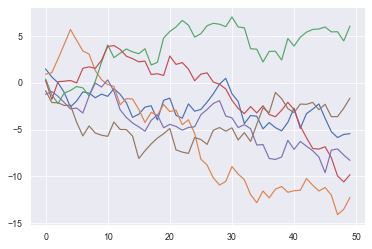

In [165]:
sns.set_context('paper')
randplot();

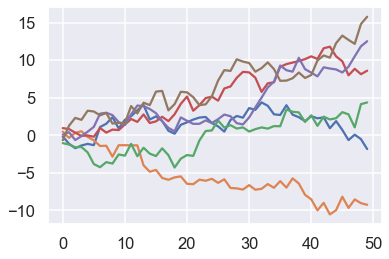

In [166]:
sns.set_context('talk')
randplot();

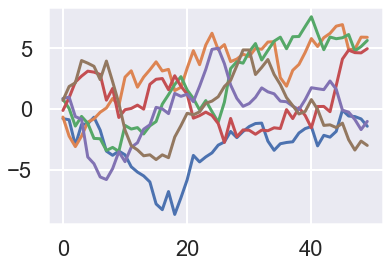

In [167]:
sns.set_context('poster')
randplot();

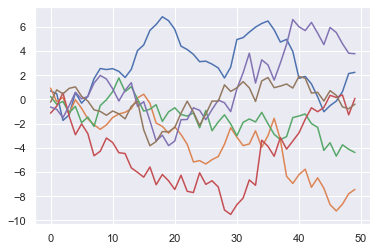

In [168]:
sns.set_context('notebook')
randplot();

### 컬러 팔레트 선택

In [169]:
sns.set()

#### 질적 색상 팔레트

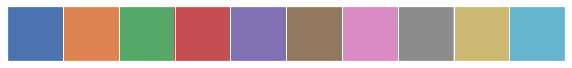

In [171]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

#### 원형 컬러 시스템 사용

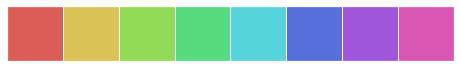

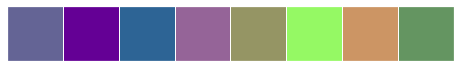

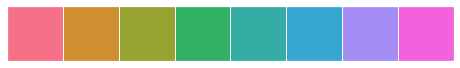

In [172]:
sns.palplot(sns.color_palette('hls',8))
sns.palplot(sns.hls_palette(8, l=3, s=.8))
sns.palplot(sns.color_palette('husl',8))

#### 사용자 정의 순차적 팔레트

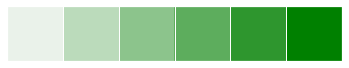

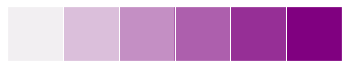

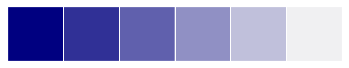

In [174]:
sns.palplot(sns.light_palette('green'))
sns.palplot(sns.light_palette('purple'))
sns.palplot(sns.light_palette('navy', reverse=True))

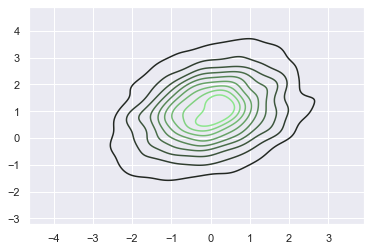

In [175]:
pal = sns.dark_palette('palegreen', as_cmap=True)
sns.kdeplot(x,y, cmap=pal);

#### 기본 색상 표 설정

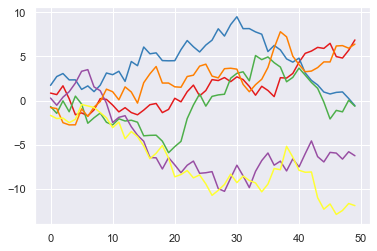

In [176]:
sns.set_palette('Set1')
randplot();

#### Reference : 이수안컴퓨터연구소(https://www.youtube.com/watch?v=gWhwAY5Q9Ec)